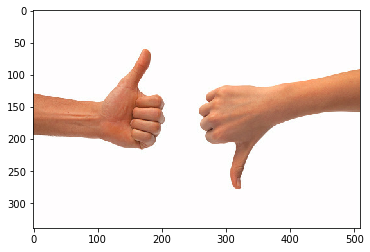

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline
image = cv2.imread('images/thumbs_up_down.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)

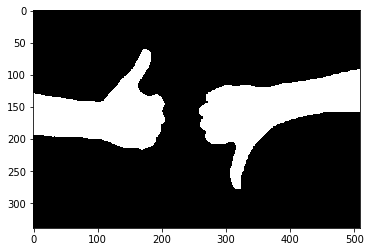

In [3]:
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
retval, binary = cv2.threshold(gray, 225, 255, cv2.THRESH_BINARY_INV)
plt.imshow(binary,cmap='gray')

In [9]:
_,contours,hierarchy = cv2.findContours(binary,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
contours_image = np.copy(image)
contours_image = cv2.drawContours(contours_image,contours,-1,(0,255,0),3)
plt.imshow(contours_image)

ValueError: not enough values to unpack (expected 3, got 2)